**Exercise**

Calculate number of PAX per departure month using the coupons file

Join with transmissions using TCN (using cogroup), calculate the min departure date of all coupons, calculate diff between departure date and booking date, group by 1,2,3,etc days, calculate histogram, plot using bar plot



In [1]:
ls = sc.textFile('data/coupon150720.csv')

u'79062005698500,1,MAA,AUH,9W,9W,56.79,USD,1,H,H,0526,150904,OK,IAF0'

In [3]:
d = ls.map(lambda x: x.split(",")[12]).map()

In [4]:
d.first()

u'150904'

In [5]:
from time import strptime

In [20]:
x = d.filter(lambda x: x != "").map(lambda x: strptime(x,"%y%m%d")).map(lambda x: (str(x.tm_year)+"-"+str(x.tm_mon),1))

In [21]:
x.first()

('2015-9', 1)

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
pax = x.groupByKey().mapValues(lambda vs: len(vs))

In [28]:
xs = pax.map(lambda x: x[0]).collect()

In [29]:
ys = pax.map(lambda x: x[1]).collect()

([<matplotlib.axis.XTick at 0x7fc2788c3450>,
 <a list of 13 Text xticklabel objects>)

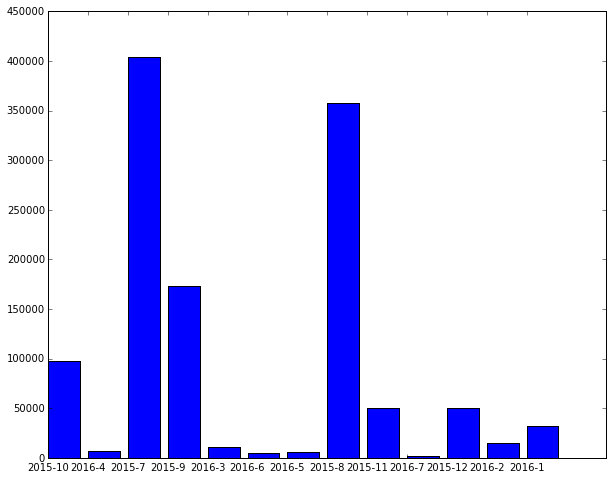

In [46]:
plt.figure(figsize=(10,8))
plt.bar(range(len(ys)),ys)
plt.xticks(range(len(xs)),xs)

In [47]:
ts = sc.textFile('data/transm150720.csv')

In [48]:
ts.first()

u'79062005698500,TKTT,30,150719,FR,0.0,EUR,T,T,141025,PARA127A8,0.0,EUR,   ,EX,,150719,0.0'

In [49]:
## Join both to get issue date and departure date (Min of all coupons)
## Calculate histogram (using pre-selected bins) and plot a bar plot of the distribution of advance booking

In [52]:
ds = d.filter(lambda x: x != "").map(lambda x: strptime(x,"%y%m%d")).take(5)

In [55]:
from time import mktime

In [58]:
mktime(ds[0])-mktime(ds[1]) # seconds -> days

-86400.0